 # Library Imports

In [5]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Configure visualization settings
sns.set_context("notebook", font_scale=1.5)

# Mount Google Drive to access files, skip remounting if already mounted
# try:
#     from google.colab import drive
#     drive.mount('/content/drive')
# except:
#     print("Drive already mounted or not in Colab environment.")

file_path = '/content/Dataset4_EWS.xlsx'
#file_path = './data/Dataset4_EWS.xlsx'


# Data Loading

From Bloomberg, consisting of weekly observations of:

- Market and macroeconomic indicators (e.g., indices, rates).
- A response variable `Y` indicating **anomalous periods** (e.g., market stress events).

In [6]:
# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Load the data from the Excel file
# First sheet contains market data with dates and anomaly labels, second sheet contains metadata
data_df = pd.read_excel(file_path, sheet_name='Markets')
metadata_df = pd.read_excel(file_path, sheet_name='Metadata')

# Check the structure of the loaded data
print("Data columns:", data_df.columns.tolist())

# Extract date and anomaly label columns
date_col = 'Date' if 'Date' in data_df.columns else data_df.columns[0]
y_col = 'Y' if 'Y' in data_df.columns else None

# Convert dates to datetime format
data_df[date_col] = pd.to_datetime(data_df[date_col], dayfirst=True)  # Date format is dd/mm/yy

# Set date as index
data_df = data_df.set_index(date_col)

# Extract features (all columns except Y if it exists)
if y_col:
    X_df = data_df.drop(y_col, axis=1)
    y = data_df[y_col].values
else:
    X_df = data_df
    y = None

# Display basic information about the dataset
print(f"Data shape: {X_df.shape}")
print(f"Total number of records: {len(X_df)}")
print(f"Time period: from {X_df.index.min().strftime('%m/%d/%Y')} to {X_df.index.max().strftime('%m/%d/%Y')}")
print(f"Frequency: {pd.infer_freq(X_df.index) or 'Weekly'}")
print(f"Number of variables: {X_df.shape[1]}")
if y_col:
    print(f"Number of anomalies: {np.sum(y == 1)} ({np.mean(y == 1)*100:.2f}%)")

# Create a more comprehensive metadata table with additional statistics
enhanced_metadata = []

# Determine the correct column names for ticker and description
ticker_col = 'ticker' if 'ticker' in metadata_df.columns else metadata_df.columns[0]
desc_col = 'description' if 'description' in metadata_df.columns else metadata_df.columns[1] if len(metadata_df.columns) > 1 else ticker_col

for ticker in X_df.columns:
    # Get metadata for this ticker if available
    meta_row = metadata_df[metadata_df[ticker_col] == ticker] if ticker in metadata_df[ticker_col].values else pd.DataFrame()

    # Get description or use ticker if not found
    description = meta_row[desc_col].values[0] if not meta_row.empty and desc_col in meta_row.columns else ticker

    # Calculate statistics for this series
    series = X_df[ticker]

    enhanced_metadata.append({
        'Ticker': ticker,
        'Description': description,
        'Mean': series.mean(),
        'Std.Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Missing values': series.isna().sum(),
        'Missing (%)': f"{series.isna().mean()*100:.2f}%"
    })

# Create enhanced metadata dataframe
enhanced_meta_df = pd.DataFrame(enhanced_metadata)

# Display the enhanced metadata
print("\nMetadata and statistics:")
display(enhanced_meta_df)

Data columns: ['Data', 'BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL', 'Y']
Data shape: (1111, 42)
Total number of records: 1111
Time period: from 01/11/2000 to 04/20/2021
Frequency: W-TUE
Number of variables: 42
Number of anomalies: 237 (21.33%)

Metadata and statistics:


,Ticker,Description,Mean,Std.Dev,Min,Max,Missing values,Missing (%)
0,BDIY,Baltic Dry Index,2259.860486,2017.811888,291.00000,11793.00000,0,0.00%
1,CRY,TR/CC CRB ER Index,245.247649,68.278081,106.29290,467.57000,0,0.00%
2,Cl1,Generic 1st 'CL' Future,60.708101,25.900813,10.01000,140.97000,0,0.00%
3,DXY,DOLLAR INDEX SPOT,90.934982,11.379095,71.32900,119.82000,0,0.00%
4,ECSURPUS,Bloomberg ECO US Surprise Inde,0.036153,0.349453,-0.97400,0.99100,0,0.00%
5,EMUSTRUU,EM USD Aggregate,704.379495,309.951768,230.52670,1286.35300,0,0.00%
6,EONIA,EMMI EURO OverNight Index Aver,1.363676,1.721894,-0.49800,5.73000,0,0.00%
7,GBP,British Pound Spot,1.569618,0.212340,1.17230,2.08520,0,0.00%
8,GT10,US TREASURY N/B,3.266748,1.332464,0.50800,6.74800,0,0.00%
9,GTDEM10Y,BUNDESREPUB. DEUTSCHLAND,2.448365,1.851558,-0.79400,5.64400,0,0.00%


# Autoencoder
### What is an autoencoder?
An autoencoder is a type of neural network architecture that learns to compress data into a lower-dimensional representation (encoding) and then reconstruct the original data from this compressed form (decoding).

### How an autoencoder is used for binary classification
An autoencoder is trained only on normal data to learn how to reconstruct it accurately. At test time, it reconstructs new inputs. If the reconstruction error is low, the data is likely normal; if high, it’s considered an anomaly. A threshold on the error is used to classify samples as normal or anomalous. This makes autoencoders effective for unsupervised anomaly detection.

### Why use an autoencoder?
The main benefits of using autoencoders for binary classification include:

*   Ability to work well with limited labeled data
*   Effective dimensionality reduction
*   Potential for better handling of imbalanced datasets
*   Anomaly detection capabilities



In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns

# Autoencoder for binary classification

### Data Preparation
Splits data into training, validation, and test sets through shuffle:


*   **Training set:** contains only normal data (class 0) -> 80% of the normal data
*   **Validation set:** contains both normal and anomaly data (classes 0 and 1) -> 10% of the normal data and 50% of the anomalies
*   **Test set:** contains both normal and anomaly data (classes 0 and 1) -> 10% of the normal data and 50% of the anomalies


In [8]:
# --- Dataset ---
X = X_df.values

# --- Split data into Training, Validation and Test sets ---
# Shuffle
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

X_normal = X_shuffled[y_shuffled == 0]
X_anomaly = X_shuffled[y_shuffled == 1]

n_normal = X_normal.shape[0]
n_anomaly = X_anomaly.shape[0]

train_size = int(0.8 * n_normal)
cv_normal_size = int(0.1 * n_normal)
cv_anomaly_size = int(0.5 * n_anomaly)

X_train_raw = X_normal[:train_size]
X_cv_normal = X_normal[train_size:train_size + cv_normal_size]
X_cv_anomaly = X_anomaly[:cv_anomaly_size]
X_cross_val_raw = np.vstack((X_cv_normal, X_cv_anomaly))
y_cross_val = np.hstack((np.zeros(cv_normal_size), np.ones(cv_anomaly_size)))

X_test_normal = X_normal[train_size + cv_normal_size:]
X_test_anomaly = X_anomaly[cv_anomaly_size:]
X_test_raw = np.vstack((X_test_normal, X_test_anomaly))
y_test = np.hstack((np.zeros(len(X_test_normal)), np.ones(len(X_test_anomaly))))

# --- StandardScaler ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_cross_val = scaler.transform(X_cross_val_raw)
X_test = scaler.transform(X_test_raw)

print(f"Training set size: {X_train.shape[0]} (all normal)")
print(f"Cross-validation set size: {X_cross_val.shape[0]} ({cv_normal_size} normal, {cv_anomaly_size} anomalies)")
print(f"Test set size: {X_test.shape[0]} ({len(X_test_normal)} normal, {len(X_test_anomaly)} anomalies)")

Training set size: 699 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)


### Autoencoder Architecture
*   **Input layer:** Matches the input data dimension
*   **Encoder:** Two hidden layers (128 → 64 neurons) with ReLU activation
*   **Bottleneck:** Latent space with 20 dimensions
*   **Decoder:** Two hidden layers (64 → 128 neurons) with ReLU activation
*   **Output layer:** Reconstructs the original input dimension

Uses batch normalization and L2 regularization for stability

In [9]:
# --- Hyperparameters ---
LATENT_DIM = 30
INPUT_DIM = X_train.shape[1]
REG_STRENGTH = 1e-5           # L2 regularization strength

# --- Autoencoder class ---
def build_autoencoder():

    # Input Layer
    encoder_inputs = layers.Input(shape=(INPUT_DIM,))

    # Encoder
    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(REG_STRENGTH))(encoder_inputs)
    x = layers.BatchNormalization()(x)

    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(REG_STRENGTH))(x)
    x = layers.BatchNormalization()(x)

    # Bottleneck -> Latent space
    latent = layers.Dense(LATENT_DIM, activation='relu', name='latent_layer')(x)

    # Decoder
    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(REG_STRENGTH))(latent)
    x = layers.BatchNormalization()(x)

    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(REG_STRENGTH))(x)
    x = layers.BatchNormalization()(x)

    # Output Layer
    decoder_outputs = layers.Dense(INPUT_DIM, activation='linear')(x)

    autoencoder = models.Model(encoder_inputs, decoder_outputs, name='autoencoder')
    encoder = models.Model(encoder_inputs, latent, name='encoder')

    return autoencoder, encoder

### Training process
Trains only on normal data (training set):


**Objective:** Minimize the reconstruction error using Mean Squared Error (MSE) loss between the original input X and the reconstructed output X. The autoencoder learns to reproduce input data as accurately as possible.
Since the model trains exclusively on normal data, it becomes highly effective at reconstructing normal patterns while performing poorly on anomalous patterns. This asymmetry enables anomaly detection:
*  *Low reconstruction error* → Normal data (follows learned patterns).
*  *High reconstruction error* → Anomalous data (deviates from learned patterns).


Uses **Adam optimizer** with learning rate 0.001.

Implements **early stopping** and **learning rate reduction**.

Monitors **validation loss** to prevent overfitting.

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_layer (Dense)            │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 42)             │         5,418 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,968 (128.78 KB)

 Trainable params: 32,200 (125.78 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 374ms/step - loss: 1.9808 - val_loss: 1.0031 - learning_rate: 0.0010
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7748 - val_loss: 0.9008 - learning_rate: 0.0010
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3734 - val_loss: 0.8135 - learning_rate: 0.0010
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2555 - val_loss: 0.7518 - learning_rate: 0.0010
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1529 - val_loss: 0.7027 - learning_rate: 0.0010
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1175 - val_loss: 0.6597 - learning_rate: 0.0010
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1054 - val_loss: 0.6108 - learning_rate: 0.0010
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1054 - val_loss: 0.5699 - learning_rate: 0.0010
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0868 - val_loss: 0.5219 - learning_rate: 0.0010
Epoch 10/200
10/1

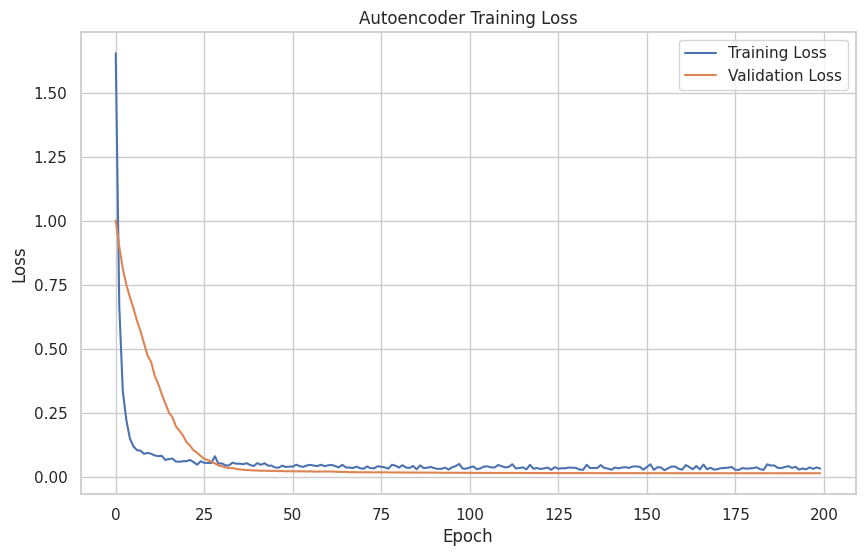

In [10]:
autoencoder, encoder = build_autoencoder()

# --- Compile and show the summary of the model ---
autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse'
)
autoencoder.summary()

# --- Early Stopping ---
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    restore_best_weights=True
)

# --- Learning Rate reduction ---
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

# --- Training Autoencoder  ---
history = autoencoder.fit(
    X_train, X_train,     # The objective is the reconstruction: original X = reconstructed X
    epochs=200,
    batch_size=64,
    validation_split=0.1, # Internal Validation
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# --- Plot Autoencoder Training and Validation Loss ---
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Anomaly Detection Process

1. **Compute Reconstruction Error:**
For each sample, the autoencoder attempts to reconstruct the input. The reconstruction error is calculated as the Mean Squared Error between the original input and the reconstructed output.
Higher reconstruction error indicates likely anomaly because the autoencoder was trained only on normal data and struggles to reconstruct patterns it hasn't seen before.
2. **Threshold Optimization on Validation Set**:
Calculate reconstruction errors for all samples in the validation set (which contains both normal and anomaly data).
Test different threshold values across the range of reconstruction errors.
For each threshold, classify samples as:
     *   **anomaly** if error > threshold.
     *   **normal** if error ≤ threshold.

  Evaluate classification performance using F1-score.

3. **Final Classification on Test Set:**
Apply the optimized threshold to the test set reconstruction errors
Evaluate final model performance using the test set results


Calculating reconstruction error on the validation set...
Calculating reconstruction error on the test set...


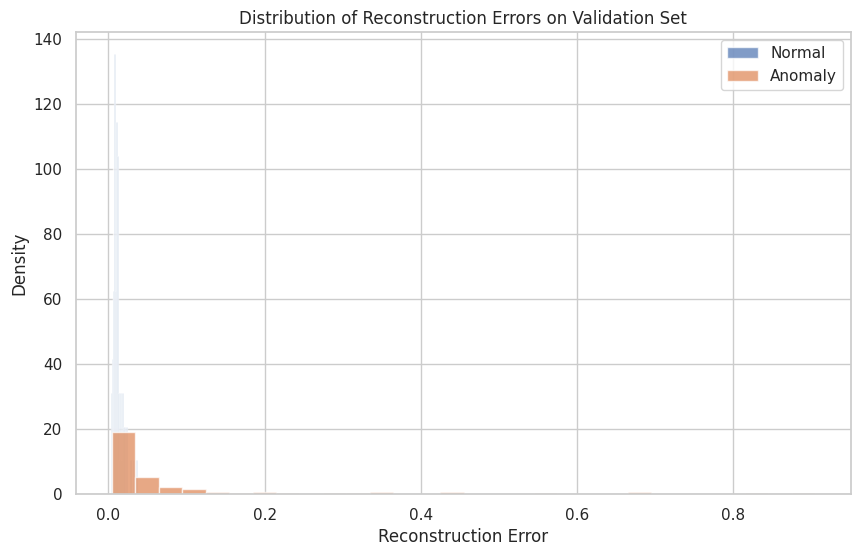

ROC AUC on validation set: 0.8516


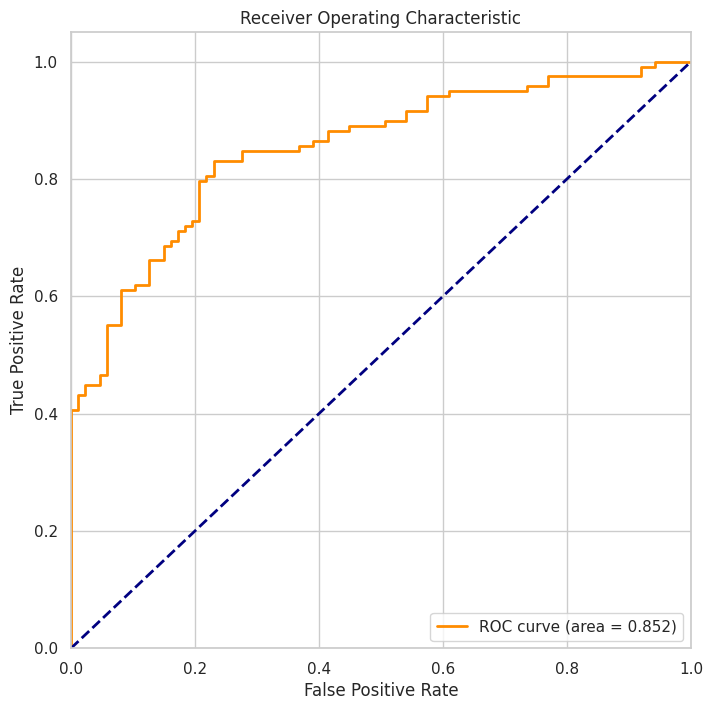


Threshold Optimization...
Thresh	Precision	Recall	F1	Accuracy
0.0000	0.576		1.000	0.731	0.576
0.0010	0.576		1.000	0.731	0.576
0.0020	0.576		1.000	0.731	0.576
0.0030	0.578		1.000	0.733	0.580
0.0040	0.584		1.000	0.738	0.590
0.0051	0.594		0.992	0.743	0.605
0.0061	0.608		0.975	0.749	0.624
0.0071	0.631		0.958	0.761	0.654
0.0081	0.681		0.941	0.790	0.712
0.0091	0.697		0.898	0.785	0.717
0.0101	0.727		0.881	0.797	0.741
0.0111	0.781		0.847	0.813	0.776
0.0121	0.817		0.831	0.824	0.795
0.0131	0.828		0.814	0.821	0.795
0.0141	0.832		0.797	0.814	0.790
0.0152	0.830		0.746	0.786	0.766
0.0162	0.840		0.712	0.771	0.756
0.0172	0.854		0.695	0.766	0.756
0.0182	0.875		0.653	0.748	0.746
0.0192	0.880		0.619	0.726	0.732
0.0202	0.889		0.610	0.724	0.732
0.0212	0.908		0.585	0.711	0.727
0.0222	0.904		0.559	0.691	0.712
0.0232	0.903		0.551	0.684	0.707
0.0242	0.928		0.542	0.684	0.712
0.0253	0.928		0.542	0.684	0.712
0.0263	0.924		0.517	0.663	0.698
0.0273	0.923		0.508	0.656	0.693
0.0283	0.917		0.466	0.618	0.668
0.0293	0.

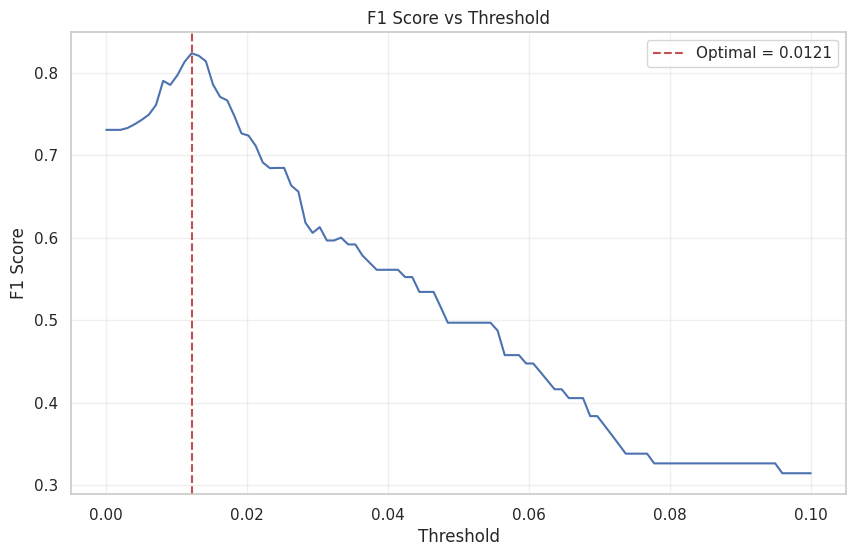

In [11]:
# --- Compute reconstruction error ---
def compute_anomaly_score(x):
    # Reconstruction
    x_reconstructed = autoencoder.predict(np.array([x]), verbose=0)[0]

    # Mean Squared Error
    reconstruction_error = np.mean(np.square(x - x_reconstructed))

    return reconstruction_error

# --- Compute reconstruction error on validation set and test set  ---
print("Calculating reconstruction error on the validation set...")
scores_cv = np.array([compute_anomaly_score(x) for x in X_cross_val])

print("Calculating reconstruction error on the test set...")
scores_test = np.array([compute_anomaly_score(x) for x in X_test])

# --- Display the distribution of reconstruction error scores on the validation set ---
plt.figure(figsize=(10, 6))
plt.hist(scores_cv[y_cross_val == 0], bins=30, alpha=0.7, label='Normal', density=True)
plt.hist(scores_cv[y_cross_val == 1], bins=30, alpha=0.7, label='Anomaly', density=True)
plt.title('Distribution of Reconstruction Errors on Validation Set')
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# --- Compute ROC AUC ---
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_cross_val, scores_cv)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC on validation set: {roc_auc:.4f}")

# ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Threshold Optimization on Validation Set: ---
print("\nThreshold Optimization...")
print("Thresh\tPrecision\tRecall\tF1\tAccuracy")

best_f1 = 0
best_thresh = 0
best_metrics = None
thresholds = np.linspace(0,0.1, 100)
f1_scores=[]
for thresh in np.linspace(0,0.1, 100):

    y_pred_cv = (scores_cv > thresh).astype(int)
    prec = precision_score(y_cross_val, y_pred_cv)
    rec = recall_score(y_cross_val, y_pred_cv)
    f1_cv = f1_score(y_cross_val, y_pred_cv)
    acc = accuracy_score(y_cross_val, y_pred_cv)

    f1_adjusted = f1_cv
    f1_scores.append(f1_adjusted)
    if f1_adjusted > best_f1:
        best_f1 = f1_adjusted
        best_thresh = thresh
        best_metrics = (prec, rec, f1_cv, acc)

    if thresh % (np.percentile(scores_cv, 99) - np.percentile(scores_cv, 1)) / 20 < (np.percentile(scores_cv, 99) - np.percentile(scores_cv, 1)) / 100:
        print(f"{thresh:.4f}\t{prec:.3f}\t\t{rec:.3f}\t{f1_cv:.3f}\t{acc:.3f}")


prec, rec, f1_cv, acc = best_metrics
print(f"\nBest Threshold: {best_thresh:.4f}")
print(f"Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1_cv:.3f}, Accuracy: {acc:.3f}")

plt.plot(thresholds, f1_scores)
plt.axvline(x=best_thresh, color='r', linestyle='--', label=f'Optimal = {best_thresh:.4f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)


### Evaluation & Visualization
Compute and displays the model's performance on the test set:

*   Confusion Matrix
*   Accuracy
*   Precision
*   Recall
*   F1 Score

#### Calculate and Visualize feature importance:

1. A random sample is taken from the test set.

2. The sample is reconstructed using the autoencoder.

3. The mean absolute reconstruction error is computed for each feature.

4. The errors are normalized to give relative importance scores.





--- Metriche di valutazione finali sul Test Set ---
Confusion Matrix:
[[ 56  32]
 [ 12 107]]
Accuracy:  0.7874
Precision: 0.7698
Recall:    0.8992
F1 Score:  0.8295


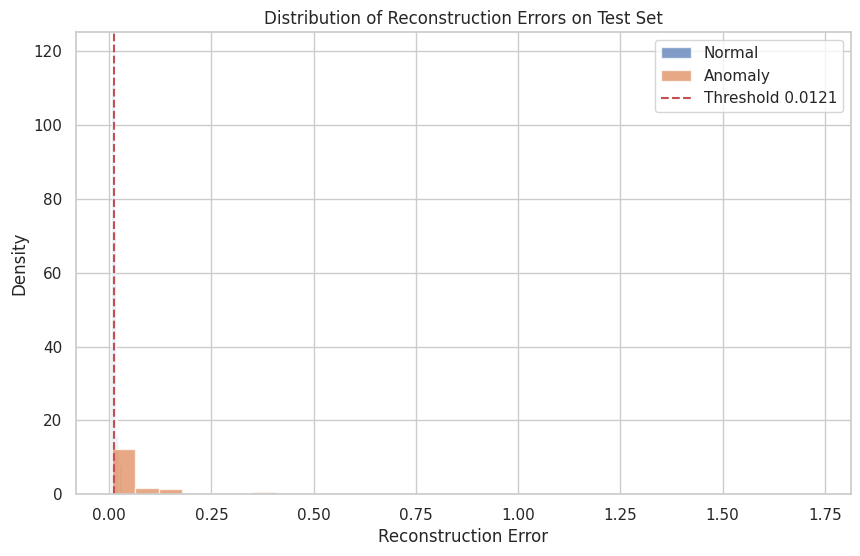

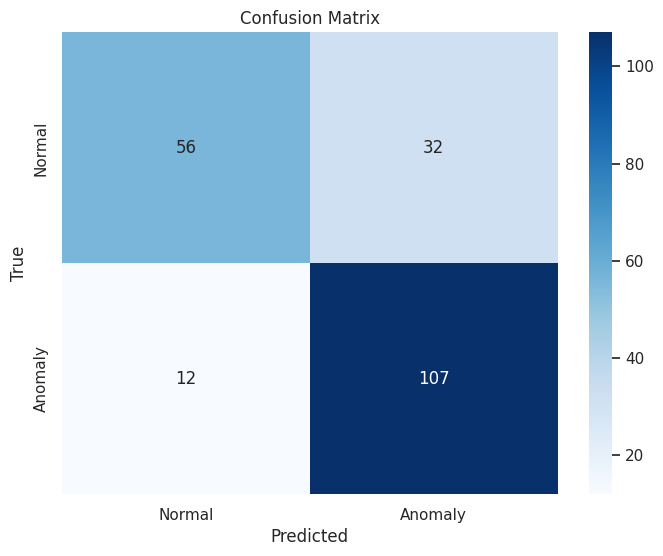

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


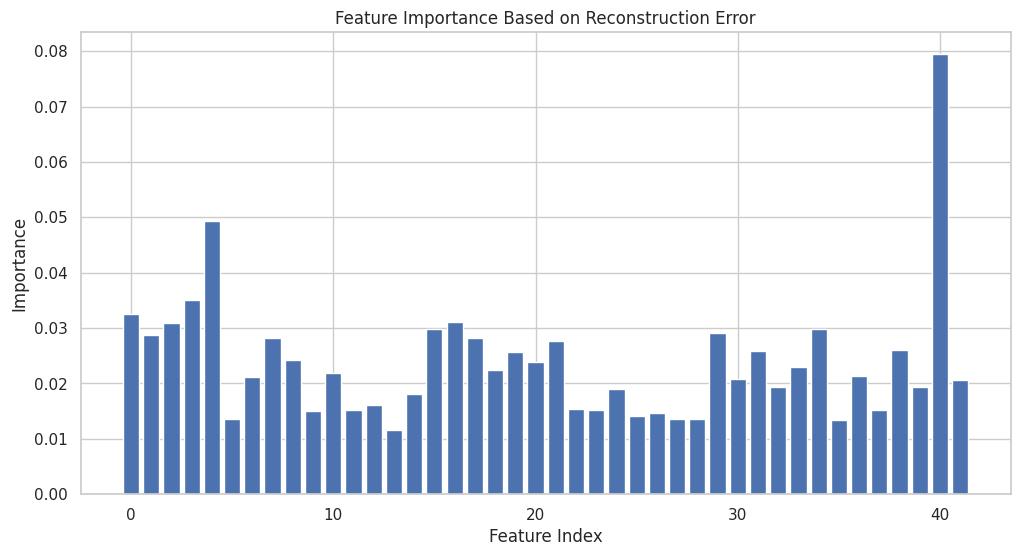


Top 10 most important features (index, importance)
Feature 40: 0.0794
Feature 4: 0.0493
Feature 3: 0.0351
Feature 0: 0.0326
Feature 16: 0.0311
Feature 2: 0.0310
Feature 34: 0.0299
Feature 15: 0.0299
Feature 29: 0.0292
Feature 1: 0.0288


In [12]:
# --- Evaluate performance on the test set ---
y_pred_test = (scores_test > best_thresh).astype(int)

cm = confusion_matrix(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)

print("\n--- Metriche di valutazione finali sul Test Set ---")
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# --- Display the distribution of reconstruction error scores on the test set ---
plt.figure(figsize=(10, 6))
plt.hist(scores_test[y_test == 0], bins=30, alpha=0.7, label='Normal', density=True)
plt.hist(scores_test[y_test == 1], bins=30, alpha=0.7, label='Anomaly', density=True)
plt.axvline(best_thresh, color='r', linestyle='--', label=f'Threshold {best_thresh:.4f}')
plt.title('Distribution of Reconstruction Errors on Test Set')
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# --- Confusion matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# --- Feature importance based on autoencoder ---
# Computes feature importance based on the reconstruction error per feature
def feature_importance():
    # Take a sample from the test set
    sample_size = min(500, X_test.shape[0])
    sample_indices = np.random.choice(X_test.shape[0], sample_size, replace=False)
    X_sample = X_test[sample_indices]

    # Reconstruct
    X_reconstructed = autoencoder.predict(X_sample)

    # Compute the error per feature
    feature_errors = np.mean(np.abs(X_sample - X_reconstructed), axis=0)

    # Normalize
    feature_importance = feature_errors / np.sum(feature_errors)

    return feature_importance

# Compute and visualize feature importance
feature_imp = feature_importance()

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_imp)), feature_imp)
plt.title('Feature Importance Based on Reconstruction Error')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.grid(True, axis='y')
plt.show()

# Show the top 10 most important features
top_indices = np.argsort(feature_imp)[-10:]
print("\nTop 10 most important features (index, importance)")
for idx in reversed(top_indices):
    print(f"Feature {idx}: {feature_imp[idx]:.4f}")